In [21]:
import pandas as pd
import requests
import numpy as np

# URL of the raw data file
url = 'https://raw.githubusercontent.com/mzelinka/cmip56_forcing_feedback_ecs/master/CMIP6_ECS_ERF_fbks.txt'

# Fetch the content from the URL
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful

# Decode the content to a string
data = response.content.decode('utf-8')

# Split the data into lines
lines = data.splitlines()

# Find the line number where the header starts
header_line_index = next(i for i, line in enumerate(lines) if line.startswith('MODEL'))

# Extract the header and data lines
header = lines[header_line_index].split()
data_lines = lines[header_line_index + 1:]

# Create a list of dictionaries for each row
data_dicts = []
for line in data_lines:
    # Split the line into columns based on fixed widths
    model = line[:20].strip()
    variant = line[20:35].strip()
    values = line[35:].split()
    row = [model, variant] + values
    data_dicts.append(dict(zip(header, row)))

# Create the DataFrame
df = pd.DataFrame(data_dicts)

# Display the DataFrame
print(df)


                   MODEL          VARIANT  \
0   --------------------  ---------------   
1             ACCESS-CM2         r1i1p1f1   
2          ACCESS-ESM1-5         r1i1p1f1   
3          AWI-CM-1-1-MR         r1i1p1f1   
4            BCC-CSM2-MR         r1i1p1f1   
5               BCC-ESM1         r1i1p1f1   
6            CAMS-CSM1-0         r1i1p1f1   
7                  CESM2         r1i1p1f1   
8              CESM2-FV2         r1i1p1f1   
9            CESM2-WACCM         r1i1p1f1   
10       CESM2-WACCM-FV2         r1i1p1f1   
11                 CIESM         r1i1p1f1   
12          CMCC-CM2-SR5         r1i1p1f1   
13             CMCC-ESM2         r1i1p1f1   
14            CNRM-CM6-1         r1i1p1f2   
15         CNRM-CM6-1-HR         r1i1p1f2   
16           CNRM-ESM2-1         r1i1p1f2   
17               CanESM5         r1i1p1f1   
18              E3SM-1-0         r1i1p1f1   
19             EC-Earth3         r8i1p1f1   
20     EC-Earth3-AerChem         r1i1p1f1   
21        

In [22]:
df = df.iloc[1:]
df = df.iloc[:53]# df = df.set_index(df['MODEL'])
import seaborn as sns
df['ECS'] = pd.to_numeric(df['ECS'], errors='coerce')
df = df.sort_values(by='ECS')


/tmp/ipykernel_189285/1305052007.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_list['RCM Ensemble'] = new_list[['MODEL','ECS']].T.apply(lambda a: f(a, array_true = highlight_a))
/tmp/ipykernel_189285/1305052007.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_list['GAN Ensemble'] = new_list[['MODEL','ECS']].T.apply(lambda a: f(a, array_true = highlight_b))
/tmp/ipykernel_189285/1305052007.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xtick

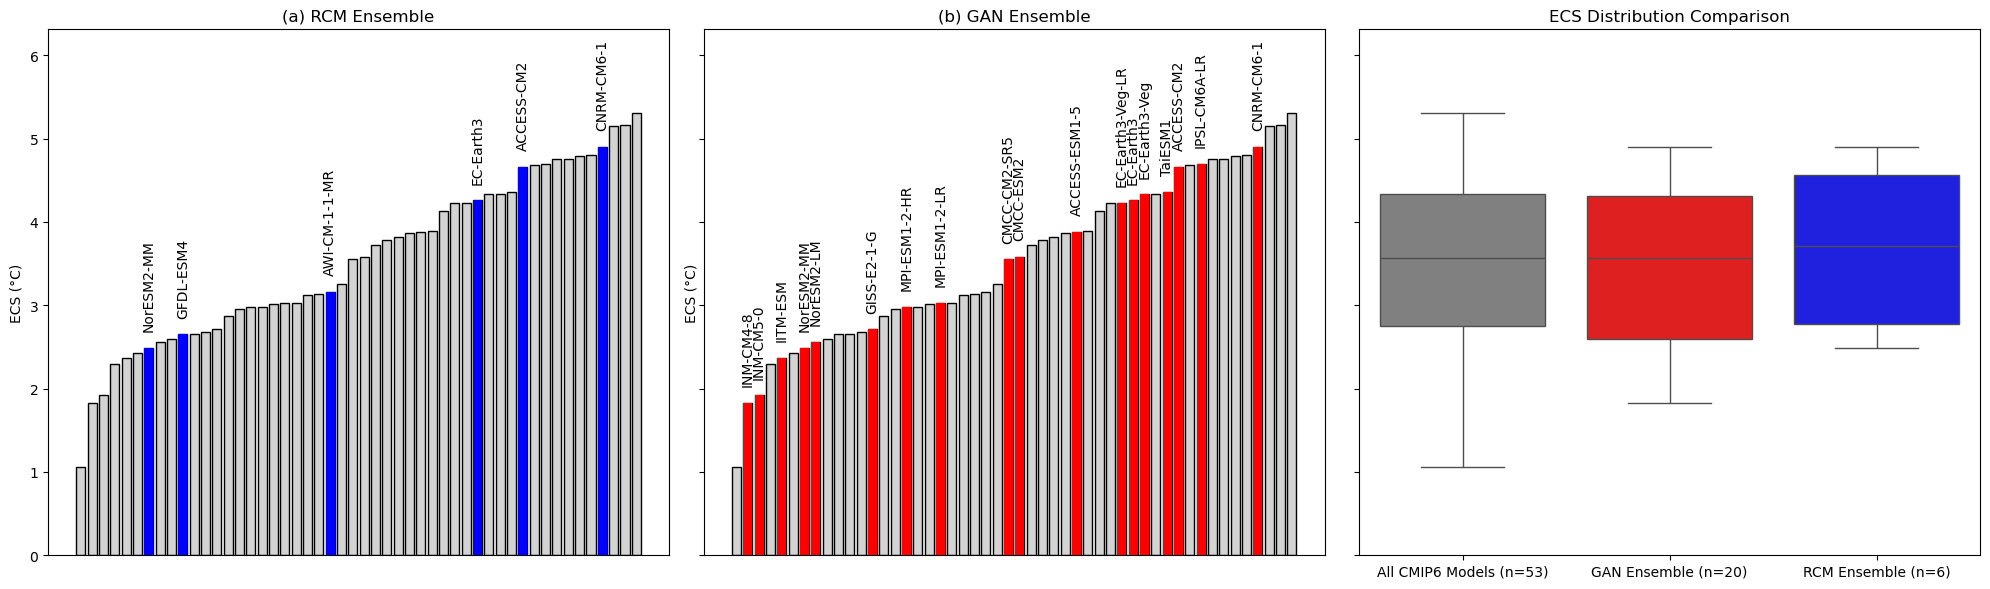

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is already loaded and cleaned
df = df.sort_values(by='ECS')

# Define highlighted GCMs
highlight_a = {"NorESM2-MM", "GFDL-ESM4", "AWI-CM-1-1-MR", "EC-Earth3", "ACCESS-CM2", "CNRM-CM6-1"}
highlight_b = {"MPI-ESM1-2-HR", "ACCESS-CM2", "ACCESS-ESM1-5", "GISS-E2-1-G", "INM-CM4-8", "INM-CM5-0", "EC-Earth3", "TaiESM1", "IPSL-CM6A-LR", "MPI-ESM1-2-LR", "NorESM2-LM", "NorESM2-MM", "CanESM5", "UKESM1-0-LL", "IITM-ESM", "CMCC-ESM2", "EC-Earth3-Veg-LR", "CNRM-CM6-1", "EC-Earth3-Veg", "CMCC-CM2-SR5"}

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey =True)

# Panel (a): Highlight 6 models
axes[0].bar(range(len(df)), df['ECS'], color="lightgray", edgecolor="black")
for i, model in enumerate(df['MODEL']):
    if model in highlight_a:
        axes[0].bar(i, df['ECS'].iloc[i], color="blue")
        axes[0].text(i, df['ECS'].iloc[i] + 0.2, model, ha='center', va='bottom', rotation=90, fontsize=10)
axes[0].set_ylabel("ECS (°C)")
axes[0].set_xticks([])
axes[0].set_title("(a) RCM Ensemble")
axes[0].set_ylim(0, df['ECS'].max() + 1)

# Panel (b): Highlight 20 models
axes[1].bar(range(len(df)), df['ECS'], color="lightgray", edgecolor="black")
for i, model in enumerate(df['MODEL']):
    if model in highlight_b:
        axes[1].bar(i, df['ECS'].iloc[i], color="red")
        axes[1].text(i, df['ECS'].iloc[i] + 0.2, model, ha='center', va='bottom', rotation=90, fontsize=10)
axes[1].set_ylabel("ECS (°C)")
axes[1].set_xticks([])
axes[1].set_title("(b) GAN Ensemble")
axes[1].set_ylim(0, df['ECS'].max() + 1)

new_list = df[['ECS','MODEL']]
def f(a, array_true):
    #print(a.shape)
    if a[0] in array_true:
        return a[1]
    else:
        return np.nan
new_list['RCM Ensemble'] = new_list[['MODEL','ECS']].T.apply(lambda a: f(a, array_true = highlight_a))
new_list['GAN Ensemble'] = new_list[['MODEL','ECS']].T.apply(lambda a: f(a, array_true = highlight_b))
#new_list['ECS_b'] = new_list[['MODEL','ECS']].apply(f)
# Distribution Comparison
sns.boxplot(data=new_list[['ECS','GAN Ensemble', 'RCM Ensemble']],
            ax=axes[2], palette=["gray", "red", "blue"])
axes[2].set_xticklabels(["All CMIP6 Models (n=53)", "GAN Ensemble (n=20)", "RCM Ensemble (n=6)"])
#axes[2].set_ylabel("ECS (°C)")
axes[2].set_title("ECS Distribution Comparison")

plt.tight_layout()
plt.show()

In [9]:
import xarray as xr

In [10]:
All_merged = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/NIWA-REMS_AI_P_T_indicators_final_v150425.nc')

In [38]:
All_merged['cc_signal_t'] = All_merged['seasonal_tasmax_future'] - All_merged['seasonal_tasmax_hist']

In [189]:
All_merged['cc_signal_pr'] = 100 * (All_merged['seasonal_pr_future'] - All_merged['seasonal_pr_hist'])/All_merged['seasonal_pr_hist']

In [31]:
gcms = All_merged.GCM.to_index().intersection(df['MODEL'])

In [53]:
df1 = df
df1.index = df['MODEL']

In [56]:
df1.loc[gcms].ECS

GCM_variant
ACCESS-CM2          4.66
ACCESS-ESM1-5       3.88
CMCC-CM2-SR5        3.55
CMCC-ESM2           3.58
CNRM-CM6-1          4.90
CanESM5             5.64
EC-Earth3-Veg-LR    4.23
EC-Earth3-Veg       4.33
EC-Earth3           4.26
GISS-E2-1-G         2.71
IITM-ESM            2.37
INM-CM4-8           1.83
INM-CM5-0           1.92
IPSL-CM6A-LR        4.70
MPI-ESM1-2-HR       2.98
MPI-ESM1-2-LR       3.03
NorESM2-LM          2.56
NorESM2-MM          2.49
TaiESM1             4.36
UKESM1-0-LL         5.36
Name: ECS, dtype: float64

In [50]:
df.

,MODEL,VARIANT,ECS,ERF2x,PL,PL*,LR,LR*,WV,RH,ALB,CLD,SWCLD,LWCLD,NET,ERR
35,INM-CM4-8,r1i1p1f1,1.83,2.70,-3.29,-1.95,-0.09,0.10,1.61,0.08,0.40,-0.13,-0.19,0.06,-1.48,0.02
36,INM-CM5-0,r1i1p1f1,1.92,2.92,-3.29,-1.95,-0.11,0.09,1.58,0.03,0.45,-0.11,-0.11,-0.00,-1.52,-0.03
6,CAMS-CSM1-0,r1i1p1f1,2.29,4.17,-3.31,-1.91,-0.62,-0.05,2.01,0.05,0.26,-0.36,-0.72,0.36,-1.82,0.19
34,IITM-ESM,r1i1p1f1,2.37,4.51,-3.28,-1.91,-0.74,-0.14,1.99,0.02,0.29,-0.08,-0.69,0.62,-1.91,-0.09
30,GISS-E2-2-G,r1i1p1f1,2.43,3.65,-3.24,-1.85,-0.84,-0.15,2.11,0.03,0.39,-0.09,-0.88,0.79,-1.51,0.17
50,NorESM2-MM,r1i1p1f1,2.49,3.73,-3.36,-1.90,-0.75,-0.16,2.11,0.06,0.34,0.43,0.30,0.14,-1.50,-0.27
49,NorESM2-LM,r1i1p1f1,2.56,3.43,-3.35,-1.90,-0.67,-0.13,2.03,0.03,0.40,0.36,0.21,0.15,-1.34,-0.10
42,MIROC6,r1i1p1f1,2.60,3.65,-3.34,-1.89,-0.64,-0.10,2.03,0.05,0.51,0.12,-0.13,0.26,-1.40,-0.10
27,GFDL-ESM4,r1i1p1f1,2.65,3.77,-3.31,-1.90,-0.68,-0.13,1.94,-0.01,0.37,0.44,-0.15,0.59,-1.42,-0.19
41,MIROC-ES2L,r1i1p1f2,2.66,4.11,-3.31,-1.91,-0.70,-0.11,1.98,-0.01,0.44,-0.02,-0.35,0.33,-1.54,0.07


In [61]:
static_fields = xr.open_dataset(r'/nesi/project/niwa03712/group_shared/Emulator_training_data/ERA5_eval_ccam_12km.198110_NZ_Invariant.nc')

In [62]:
lists = []
for gcm in gcms:
    print(gcm)
    try:
        dset = All_merged.sel(GCM_variant = (All_merged.GCM == gcm)).isel(GCM_variant =0)['cc_signal_t'].where(static_fields.orog>0, np.nan).mean(["lat","lon"])
    except:
        dset = All_merged.sel(GCM_variant = (All_merged.GCM == gcm))['cc_signal_t'].where(static_fields.orog>0, np.nan).mean(["lat","lon"])
    lists.append(dset)

ACCESS-CM2
ACCESS-ESM1-5
CMCC-CM2-SR5
CMCC-ESM2
CNRM-CM6-1
CanESM5
EC-Earth3-Veg-LR
EC-Earth3-Veg
EC-Earth3
GISS-E2-1-G
IITM-ESM
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
MPI-ESM1-2-HR
MPI-ESM1-2-LR
NorESM2-LM
NorESM2-MM
TaiESM1
UKESM1-0-LL


In [63]:
warming_rate = xr.concat(lists, dim ="GCM")
warming_rate['GCM'] = (('GCM'), gcms)

In [89]:
All_merged_CCAM = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/CCAM_P_T_indicators_final.nc')

In [91]:
All_merged_CCAM['cc_signal_t'] = All_merged_CCAM['seasonal_tasmax_future'] - All_merged_CCAM['seasonal_tasmax_hist']

In [190]:
All_merged_CCAM['cc_signal_pr'] = 100 * (All_merged_CCAM['seasonal_pr_future'] - All_merged_CCAM['seasonal_pr_hist'])/ All_merged_CCAM['seasonal_pr_hist']

In [198]:
All_merged_CCAM['cc_signal_rx1day'] = 100 * (All_merged_CCAM.Rx1day.sel(year = slice(2080, 2099)).mean("year") - All_merged_CCAM.Rx1day.sel(year = slice(1986, 2005)).mean("year"))/ All_merged_CCAM.Rx1day.sel(year = slice(1986, 2005)).mean("year")

In [199]:
All_merged['cc_signal_rx1day'] = 100 * (All_merged.Rx1day.sel(year = slice(2080, 2099)).mean("year") - All_merged.Rx1day.sel(year = slice(1986, 2005)).mean("year"))/ All_merged.Rx1day.sel(year = slice(1986, 2005)).mean("year")

In [197]:
All_merged_CCAM

<xarray.Dataset>
Dimensions:                 (GCM: 6, lon: 179, lat: 172, year: 141, season: 4)
Coordinates:
  * GCM                     (GCM) object 'ACCESS-CM2' ... 'NorESM2-MM'
  * lon                     (lon) float32 164.9 165.0 165.1 ... 183.9 184.0
  * lat                     (lat) float32 -51.21 -51.11 -51.0 ... -32.97 -32.86
  * year                    (year) int64 1960 1961 1962 1963 ... 2098 2099 2100
  * season                  (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    Rx1day                  (GCM, year, lat, lon) float64 ...
    seasonal_pr_future      (GCM, season, lat, lon) float32 ...
    seasonal_pr_hist        (GCM, season, lat, lon) float32 ...
    TXx                     (GCM, year, lat, lon) float32 ...
    seasonal_tasmax_future  (GCM, season, lat, lon) float32 ...
    seasonal_tasmax_hist    (GCM, season, lat, lon) float32 ...
    cc_signal_t             (GCM, season, lat, lon) float32 2.156 ... 2.078
    cc_signal_pr            (GCM, season, lat, lon) float32 5.199 ... -10.19

In [99]:
temps = All_merged_CCAM['cc_signal_t'].where(static_fields.orog>0, np.nan).mean(["lat","lon"]).isel(season =0)
gcms_ccam = All_merged_CCAM['cc_signal_t'].where(static_fields.orog>0, np.nan).mean(["lat","lon"]).isel(season =0).GCM

In [144]:
import cartopy.crs as ccrs

ERROR 1: PROJ: proj_create_from_database: Open of /nesi/project/niwa00018/rampaln/envs/ml_env_v2/share/proj failed


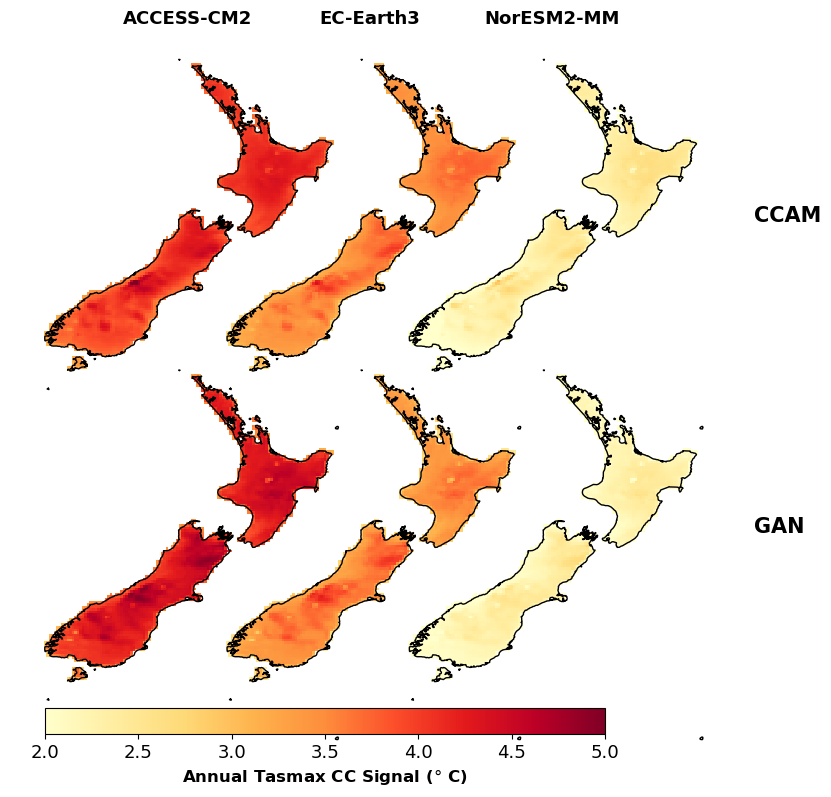

In [187]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

# Set up figure and gridspec
fig = plt.figure(figsize=(14, 13
                         ))
gs = gridspec.GridSpec(2, 6, figure=fig, wspace=0.05, hspace=-0.55)
proj = ccrs.PlateCarree(central_longitude=171.77)

# Manually create axes with projection
ax00 = fig.add_subplot(gs[0, 0:2], projection=proj)
ax01 = fig.add_subplot(gs[0, 1:3], projection=proj)
ax02 = fig.add_subplot(gs[0, 2:4], projection=proj)
ax10 = fig.add_subplot(gs[1, 0:2], projection=proj)
ax11 = fig.add_subplot(gs[1, 1:3], projection=proj)
ax12 = fig.add_subplot(gs[1, 2:4], projection=proj)

# Plotting CCAM signals
All_merged_CCAM['cc_signal_t'].where(static_fields.orog > 0, np.nan).sel(GCM=['ACCESS-CM2']).mean("season").plot(
    cmap='YlOrRd', vmin=2, vmax=5, ax=ax00, transform=ccrs.PlateCarree(), add_colorbar=False)
All_merged_CCAM['cc_signal_t'].where(static_fields.orog > 0, np.nan).sel(GCM=['EC-Earth3']).mean("season").plot(
    cmap='YlOrRd', vmin=2, vmax=5, ax=ax01, transform=ccrs.PlateCarree(), add_colorbar=False)
All_merged_CCAM['cc_signal_t'].where(static_fields.orog > 0, np.nan).sel(GCM=['NorESM2-MM']).mean("season").plot(
    cmap='YlOrRd', vmin=2, vmax=5, ax=ax02, transform=ccrs.PlateCarree(), add_colorbar=False)

# Plotting raw GCM signals
All_merged['cc_signal_t'].where(static_fields.orog > 0, np.nan).sel(GCM_variant=['ACCESS-CM2_r4i1p1f1']).mean("season").plot(
    cmap='YlOrRd', vmin=2, vmax=5, ax=ax10, transform=ccrs.PlateCarree(), add_colorbar=False)
All_merged['cc_signal_t'].where(static_fields.orog > 0, np.nan).sel(GCM_variant=['EC-Earth3_r1i1p1f1']).mean("season").plot(
    cmap='YlOrRd', vmin=2, vmax=5, ax=ax11, transform=ccrs.PlateCarree(), add_colorbar=False)
cs = All_merged['cc_signal_t'].where(static_fields.orog > 0, np.nan).sel(GCM_variant=['NorESM2-MM_r1i1p1f1']).mean("season").plot(
    cmap='YlOrRd', vmin=2, vmax=5, ax=ax12, transform=ccrs.PlateCarree(), add_colorbar=False)

# Clean titles and frames
for ax in [ax00, ax01, ax02, ax10, ax11, ax12]:
    ax.set_title(' ')
    ax.set_frame_on(False)
    ax.coastlines('10m')
    ax.set_extent([165, 180, -50, -33], crs = ccrs.PlateCarree())
cbar_ax = fig.add_axes([0.15, 0.23, 0.4, 0.02])
cbar = fig.colorbar(cs, cax = cbar_ax, orientation ='horizontal')
cbar.set_label('Annual Tasmax CC Signal ($\degree$ C)', fontsize =12, weight ='bold')
cbar.ax.tick_params(labelsize =13)
ax00.set_title('ACCESS-CM2', weight ='bold', fontsize =13)
ax01.set_title('EC-Earth3', weight ='bold', fontsize =13)
ax02.set_title('NorESM2-MM', weight ='bold', fontsize =13)
ax02.text(181, -41, 'CCAM', fontsize =15, transform = ccrs.PlateCarree(), weight ='bold')
ax12.text(181, -41, 'GAN', fontsize =15, transform = ccrs.PlateCarree(), weight ='bold')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Comparison_of_spatial_cc_signal.png', dpi =500, bbox_inches ='tight')
plt.show()

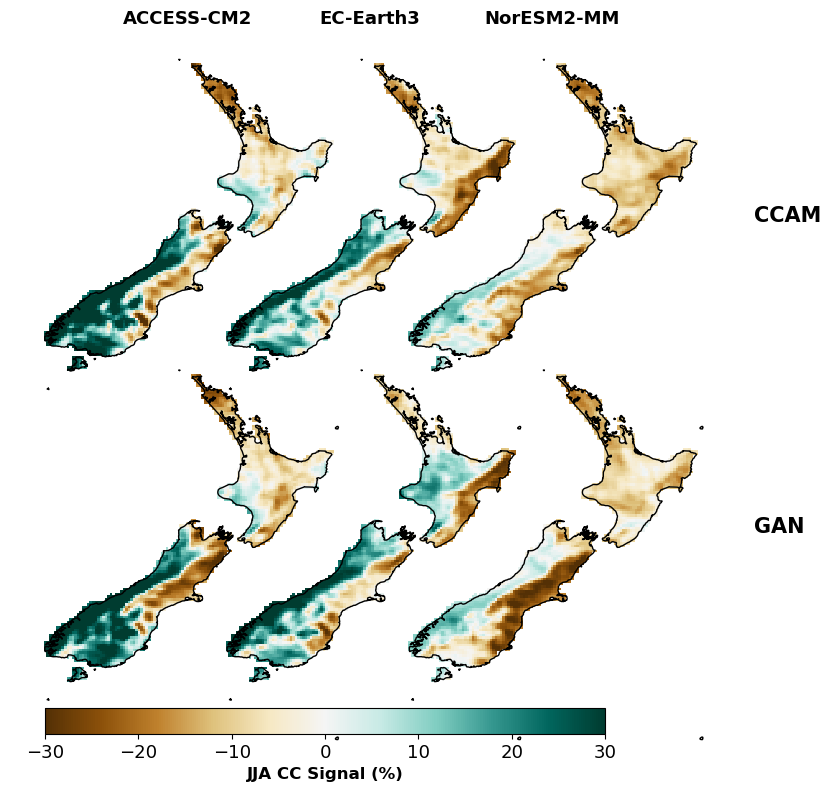

In [195]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

# Set up figure and gridspec
fig = plt.figure(figsize=(14, 13
                         ))
gs = gridspec.GridSpec(2, 6, figure=fig, wspace=0.05, hspace=-0.55)
proj = ccrs.PlateCarree(central_longitude=171.77)

# Manually create axes with projection
ax00 = fig.add_subplot(gs[0, 0:2], projection=proj)
ax01 = fig.add_subplot(gs[0, 1:3], projection=proj)
ax02 = fig.add_subplot(gs[0, 2:4], projection=proj)
ax10 = fig.add_subplot(gs[1, 0:2], projection=proj)
ax11 = fig.add_subplot(gs[1, 1:3], projection=proj)
ax12 = fig.add_subplot(gs[1, 2:4], projection=proj)

# Plotting CCAM signals
All_merged_CCAM['cc_signal_pr'].where(static_fields.orog > 0, np.nan).sel(GCM=['ACCESS-CM2']).isel(season =1).plot(
    cmap='BrBG', vmin=-30, vmax=30, ax=ax00, transform=ccrs.PlateCarree(), add_colorbar=False)
All_merged_CCAM['cc_signal_pr'].where(static_fields.orog > 0, np.nan).sel(GCM=['EC-Earth3']).isel(season =1).plot(
    cmap='BrBG', vmin=-30, vmax=30, ax=ax01, transform=ccrs.PlateCarree(), add_colorbar=False)
All_merged_CCAM['cc_signal_pr'].where(static_fields.orog > 0, np.nan).sel(GCM=['NorESM2-MM']).isel(season =1).plot(
    cmap='BrBG', vmin=-30, vmax=30, ax=ax02, transform=ccrs.PlateCarree(), add_colorbar=False)

# Plotting raw GCM signals
All_merged['cc_signal_pr'].where(static_fields.orog > 0, np.nan).sel(GCM_variant=['ACCESS-CM2_r4i1p1f1']).isel(season =1).plot(
    cmap='BrBG', vmin=-30, vmax=30, ax=ax10, transform=ccrs.PlateCarree(), add_colorbar=False)
All_merged['cc_signal_pr'].where(static_fields.orog > 0, np.nan).sel(GCM_variant=['EC-Earth3_r1i1p1f1']).isel(season =1).plot(
    cmap='BrBG', vmin=-30, vmax=30, ax=ax11, transform=ccrs.PlateCarree(), add_colorbar=False)
cs = All_merged['cc_signal_pr'].where(static_fields.orog > 0, np.nan).sel(GCM_variant=['NorESM2-MM_r1i1p1f1']).isel(season =1).plot(
    cmap='BrBG', vmin=-30, vmax=30, ax=ax12, transform=ccrs.PlateCarree(), add_colorbar=False)

# Clean titles and frames
for ax in [ax00, ax01, ax02, ax10, ax11, ax12]:
    ax.set_title(' ')
    ax.set_frame_on(False)
    ax.coastlines('10m')
    ax.set_extent([165, 180, -50, -33], crs = ccrs.PlateCarree())
cbar_ax = fig.add_axes([0.15, 0.23, 0.4, 0.02])
cbar = fig.colorbar(cs, cax = cbar_ax, orientation ='horizontal')
cbar.set_label('JJA CC Signal (%)', fontsize =12, weight ='bold')
cbar.ax.tick_params(labelsize =13)
ax00.set_title('ACCESS-CM2', weight ='bold', fontsize =13)
ax01.set_title('EC-Earth3', weight ='bold', fontsize =13)
ax02.set_title('NorESM2-MM', weight ='bold', fontsize =13)
ax02.text(181, -41, 'CCAM', fontsize =15, transform = ccrs.PlateCarree(), weight ='bold')
ax12.text(181, -41, 'GAN', fontsize =15, transform = ccrs.PlateCarree(), weight ='bold')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Comparison_of_spatial_cc_signal_pr_jja.png', dpi =500, bbox_inches ='tight')
plt.show()

In [202]:
All_merged_CCAM['cc_signal_pr'].where(static_fields.orog > 0, np.nan).sel(GCM=['EC-Earth3'])

<xarray.DataArray 'cc_signal_pr' (GCM: 1, season: 4, lat: 172, lon: 179)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * GCM      (GCM) object 'EC-Earth3'
  * lon      (lon) float32 164.9 165.0 165.1 165.2 ... 183.6 183.7 183.9 184.0
  * lat      (lat) float32 -51.21 -51.11 -51.0 -50.89 ... -33.07 -32.97 -32.86
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

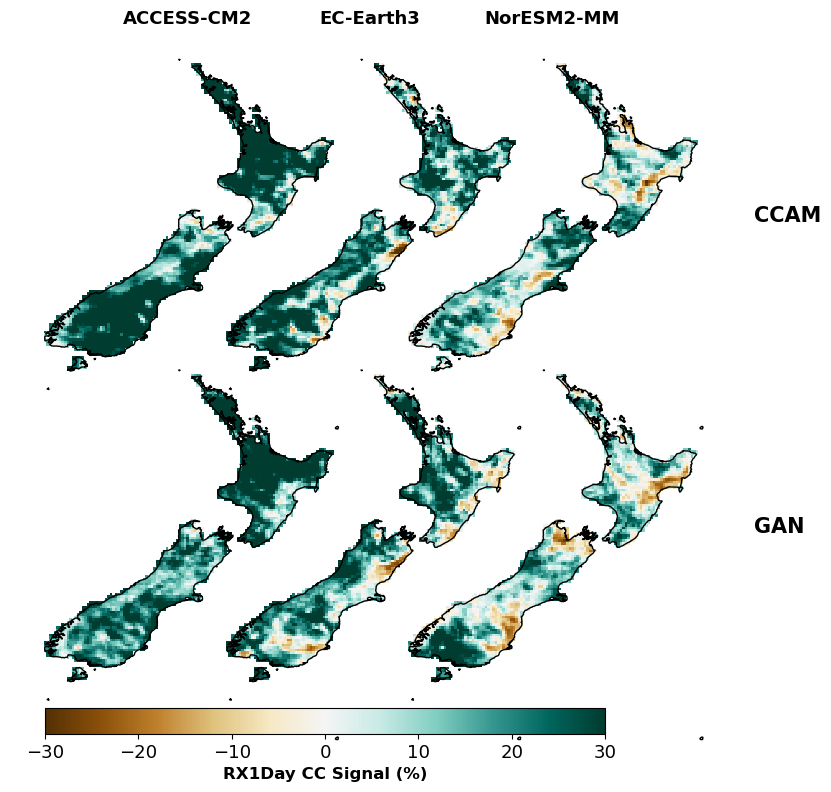

In [205]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

# Set up figure and gridspec
fig = plt.figure(figsize=(14, 13
                         ))
gs = gridspec.GridSpec(2, 6, figure=fig, wspace=0.05, hspace=-0.55)
proj = ccrs.PlateCarree(central_longitude=171.77)

# Manually create axes with projection
ax00 = fig.add_subplot(gs[0, 0:2], projection=proj)
ax01 = fig.add_subplot(gs[0, 1:3], projection=proj)
ax02 = fig.add_subplot(gs[0, 2:4], projection=proj)
ax10 = fig.add_subplot(gs[1, 0:2], projection=proj)
ax11 = fig.add_subplot(gs[1, 1:3], projection=proj)
ax12 = fig.add_subplot(gs[1, 2:4], projection=proj)

# Plotting CCAM signals
All_merged_CCAM['cc_signal_rx1day'].where(static_fields.orog > 0, np.nan).sel(GCM=['ACCESS-CM2']).plot(
    cmap='BrBG', vmin=-30, vmax=30, ax=ax00, transform=ccrs.PlateCarree(), add_colorbar=False)
All_merged_CCAM['cc_signal_rx1day'].where(static_fields.orog > 0, np.nan).sel(GCM=['EC-Earth3']).plot(
    cmap='BrBG', vmin=-30, vmax=30, ax=ax01, transform=ccrs.PlateCarree(), add_colorbar=False)
All_merged_CCAM['cc_signal_rx1day'].where(static_fields.orog > 0, np.nan).sel(GCM=['NorESM2-MM']).plot(
    cmap='BrBG', vmin=-30, vmax=30, ax=ax02, transform=ccrs.PlateCarree(), add_colorbar=False)

# Plotting raw GCM signals
All_merged['cc_signal_rx1day'].where(static_fields.orog > 0, np.nan).sel(GCM_variant=['ACCESS-CM2_r4i1p1f1']).plot(
    cmap='BrBG', vmin=-30, vmax=30, ax=ax10, transform=ccrs.PlateCarree(), add_colorbar=False)
All_merged['cc_signal_rx1day'].where(static_fields.orog > 0, np.nan).sel(GCM_variant=['EC-Earth3_r1i1p1f1']).plot(
    cmap='BrBG', vmin=-30, vmax=30, ax=ax11, transform=ccrs.PlateCarree(), add_colorbar=False)
cs = All_merged['cc_signal_rx1day'].where(static_fields.orog > 0, np.nan).sel(GCM_variant=['NorESM2-MM_r1i1p1f1']).plot(
    cmap='BrBG', vmin=-30, vmax=30, ax=ax12, transform=ccrs.PlateCarree(), add_colorbar=False)

# Clean titles and frames
for ax in [ax00, ax01, ax02, ax10, ax11, ax12]:
    ax.set_title(' ')
    ax.set_frame_on(False)
    ax.coastlines('10m')
    ax.set_extent([165, 180, -50, -33], crs = ccrs.PlateCarree())
cbar_ax = fig.add_axes([0.15, 0.23, 0.4, 0.02])
cbar = fig.colorbar(cs, cax = cbar_ax, orientation ='horizontal')
cbar.set_label('RX1Day CC Signal (%)', fontsize =12, weight ='bold')
cbar.ax.tick_params(labelsize =13)
ax00.set_title('ACCESS-CM2', weight ='bold', fontsize =13)
ax01.set_title('EC-Earth3', weight ='bold', fontsize =13)
ax02.set_title('NorESM2-MM', weight ='bold', fontsize =13)
ax02.text(181, -41, 'CCAM', fontsize =15, transform = ccrs.PlateCarree(), weight ='bold')
ax12.text(181, -41, 'GAN', fontsize =15, transform = ccrs.PlateCarree(), weight ='bold')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Comparison_of_spatial_cc_signal_pr_rx1day.png', dpi =500, bbox_inches ='tight')
plt.show()

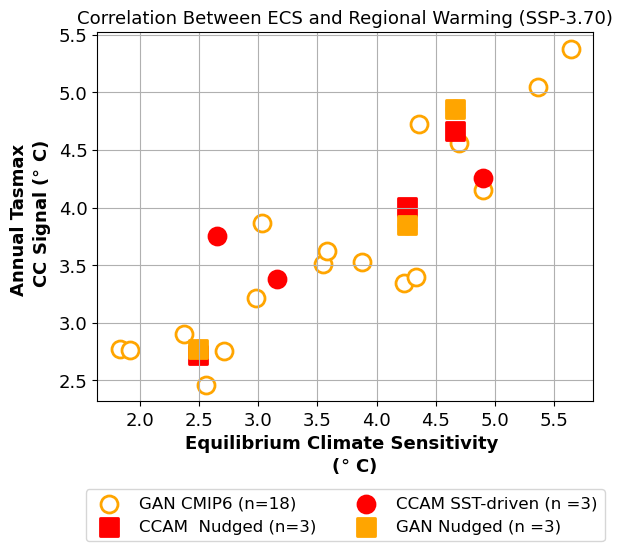

In [133]:
fig, ax = plt.subplots()
ax.scatter(df1.loc[gcms].ECS, warming_rate.isel(season =0) , ec= 'orange', marker ='o', lw =2, s = 150, fc ='white', label ='GAN CMIP6 (n=18)')
ax.scatter(df1.loc[['ACCESS-CM2', 'EC-Earth3', 'NorESM2-MM']].ECS, temps.sel(GCM = ['ACCESS-CM2', 'EC-Earth3', 'NorESM2-MM'])  , ec= 'r', marker ='s', lw =2, s = 150, fc ='r', label ='CCAM  Nudged (n=3)')
ax.scatter(df1.loc[['AWI-CM-1-1-MR', 'CNRM-CM6-1', 'GFDL-ESM4']].ECS, temps.sel(GCM = ['AWI-CM-1-1-MR', 'CNRM-CM6-1', 'GFDL-ESM4'])  , ec= 'r', marker ='o', lw =2, s = 150, fc ='r', label ='CCAM SST-driven (n =3)')
ax.scatter(df1.loc[['ACCESS-CM2', 'EC-Earth3', 'NorESM2-MM']].ECS, warming_rate.isel(season =0).sel(GCM =['ACCESS-CM2', 'EC-Earth3', 'NorESM2-MM']) , ec= 'orange', marker ='s', lw =2, s = 150, fc ='orange', label ='GAN Nudged (n =3)')
ax.set_xlabel('Equilibrium Climate Sensitivity \n   ($\degree$ C)', weight ='bold', fontsize =13)
ax.set_ylabel('Annual Tasmax \n CC Signal ($\degree$ C)', weight ='bold', fontsize =13)
ax.tick_params(labelsize =13)
ax.grid('on')
ax.legend(loc ='lower center', bbox_to_anchor =(0.5, -0.4), fontsize =12, ncol =2)
ax.set_title('Correlation Between ECS and Regional Warming (SSP-3.70)', fontsize =13)
fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/figures/Supplementary_Correlation_Between_ECS_and_Regional_Warming.png', dpi =500, bbox_inches ='tight')

In [45]:
warming_rate.mean("season")

<xarray.DataArray 'cc_signal_t' (GCM: 20)>
array([3.02853513, 2.13774991, 2.30212386, 2.41771035, 2.47668693,
       3.12199417, 2.18309896, 2.39933012, 2.42707536, 2.05269649,
       1.8559029 , 1.78539232, 1.69809007, 2.67428953, 1.93010662,
       1.99971227, 1.2972601 , 1.44815683, 3.23141388, 3.20772456])
Coordinates:
    GCM_variant  (GCM) <U25 'ACCESS-CM2_r4i1p1f1' ... 'UKESM1-0-LL_r1i1p1f2'
  * GCM          (GCM) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'

In [25]:

All_merged.GCM.to_index().intersection(df['MODEL'])

Index(['ACCESS-CM2', 'ACCESS-ESM1-5', 'CMCC-CM2-SR5', 'CMCC-ESM2',
       'CNRM-CM6-1', 'CanESM5', 'EC-Earth3-Veg-LR', 'EC-Earth3-Veg',
       'EC-Earth3', 'GISS-E2-1-G', 'IITM-ESM', 'INM-CM4-8', 'INM-CM5-0',
       'IPSL-CM6A-LR', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'NorESM2-LM',
       'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL'],
      dtype='object', name='GCM_variant')

In [23]:
df

,MODEL,VARIANT,ECS,ERF2x,PL,PL*,LR,LR*,WV,RH,ALB,CLD,SWCLD,LWCLD,NET,ERR
35,INM-CM4-8,r1i1p1f1,1.83,2.70,-3.29,-1.95,-0.09,0.10,1.61,0.08,0.40,-0.13,-0.19,0.06,-1.48,0.02
36,INM-CM5-0,r1i1p1f1,1.92,2.92,-3.29,-1.95,-0.11,0.09,1.58,0.03,0.45,-0.11,-0.11,-0.00,-1.52,-0.03
6,CAMS-CSM1-0,r1i1p1f1,2.29,4.17,-3.31,-1.91,-0.62,-0.05,2.01,0.05,0.26,-0.36,-0.72,0.36,-1.82,0.19
34,IITM-ESM,r1i1p1f1,2.37,4.51,-3.28,-1.91,-0.74,-0.14,1.99,0.02,0.29,-0.08,-0.69,0.62,-1.91,-0.09
30,GISS-E2-2-G,r1i1p1f1,2.43,3.65,-3.24,-1.85,-0.84,-0.15,2.11,0.03,0.39,-0.09,-0.88,0.79,-1.51,0.17
50,NorESM2-MM,r1i1p1f1,2.49,3.73,-3.36,-1.90,-0.75,-0.16,2.11,0.06,0.34,0.43,0.30,0.14,-1.50,-0.27
49,NorESM2-LM,r1i1p1f1,2.56,3.43,-3.35,-1.90,-0.67,-0.13,2.03,0.03,0.40,0.36,0.21,0.15,-1.34,-0.10
42,MIROC6,r1i1p1f1,2.60,3.65,-3.34,-1.89,-0.64,-0.10,2.03,0.05,0.51,0.12,-0.13,0.26,-1.40,-0.10
27,GFDL-ESM4,r1i1p1f1,2.65,3.77,-3.31,-1.90,-0.68,-0.13,1.94,-0.01,0.37,0.44,-0.15,0.59,-1.42,-0.19
41,MIROC-ES2L,r1i1p1f2,2.66,4.11,-3.31,-1.91,-0.70,-0.11,1.98,-0.01,0.44,-0.02,-0.35,0.33,-1.54,0.07
